In [41]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .consignes{
#   font-weight: bold;
#   color: #3256a8;
#   background-color: #edebdf
# }
# </style>
# """)


# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 18 octobre 2023, 11h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Baptiste, CALLARD

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [42]:
from __future__ import annotations
# native libraries
import os
# third party libraries
import IPython.display as ipd
import ipywidgets as widgets
import numpy as np
import matplotlib.pylab as plt
import scipy
from ipywidgets import interact
from scipy.signal import stft, welch

In [43]:
# mount my google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


J'utilise google Colab pour ce TP.

In [44]:
path_cwd = '/content/drive/MyDrive/MASTER MVA/Cours/S1/Apprentissage profond signal/TP1'

In [45]:
file_path = os.path.join(path_cwd, 'coloniedefourmies_16k.wav')

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix.
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [46]:
sampling_rate, records = scipy.io.wavfile.read(file_path, mmap=False)
ipd.Audio(filename=file_path)

Les données extraites sont au format uint16.

In [47]:
records.dtype

dtype('int16')

En accord avec la documentation, la représentation d'un int16 est la suivante.
- WAV format : 16-bit integer (Min=-32768 | Max=+32767)

Pour être en accord avec le cours, je vais rééchelonner les données entre (-1, 1)

In [48]:
records = records / 32768

- taux d'échantillonage : $\frac{nb~samples}{seconde}$
- durée de l'enregistrement : $\frac{nb~samples}{sample~rate}$

In [49]:
# nombre de samples
nb_samples = len(records)

# duree
duree = records.shape[0] / sampling_rate

# vecteur des temps d'échantilllonage
time = np.linspace(0., duree, records.shape[0])

In [50]:
print(f'Le sampling rate est de : {sampling_rate} sample/sec')
print(f'Il y a {nb_samples} samples')
print(f'La durée de l enregistrement est {np.round(duree, 3)} s')

Le sampling rate est de : 16000 sample/sec
Il y a 136625 samples
La durée de l enregistrement est 8.539 s


<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez.
    </div>

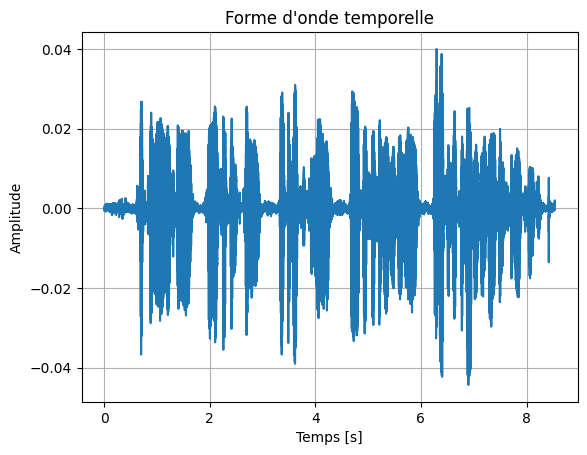

In [51]:
plt.plot(time, records)
plt.title("Forme d'onde temporelle")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

On a vu dans le cours que la méthode de Welch permet d'estimer la DSP (Densité Spectrale de Puissance)

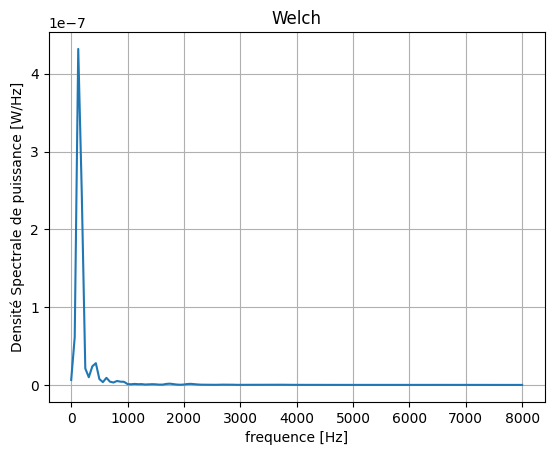

In [52]:
ff, DSP = welch(records, sampling_rate)
plt.plot(ff, DSP)
plt.title("Welch")
plt.xlabel("frequence [Hz]")
plt.ylabel("Densité Spectrale de puissance [W/Hz]")
plt.grid()
plt.show()

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

In [53]:
def pplot(f: int, t: int, stft_records: np.ndarray) -> None:
    """
    Cette fonction permet de visualiser le spetrogramme
    """
    plt.figure(figsize=(8, 6))
    plt.xlim([0.5, 5])
    plt.ylim([0, 2000])
    # Crop the STFT data
    plt.pcolormesh(t, f, 10 * np.log10(abs(stft_records)), shading='gouraud', cmap='viridis')
    plt.colorbar()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Temps [sec]')
    plt.title('Spectrogramme')
    plt.show()

In [54]:
def plot_stft(fs: int, with_plot: bool) -> None:
    """
    Cette fonction permet de calculer puis afficher le
    spectrogramme.

    - fs en (ms)
    """
    nfft, nperseg = sampling_rate * fs / 1000, sampling_rate * fs / 1000
    f, t, stft_records = stft(
    records,
    fs=sampling_rate,
    nperseg=nperseg,
    nfft=nfft,
    )
    pplot(f, t, stft_records)
    print(f'nperseg : {nperseg}')


J'ai fais une fonction intéractive pour choisir et calibrer visuellement la fenêtre pour le spectrogramme.

Plus l'on réduit le support dans le domaine temporel et plus le support dans le domaine fréquentiel augmente. Il faut donc trouver un compromis qui permet de bien observer les deux domaines. Ainsi, j'ai trouvé que pour T=80ms on avait un bon compromis entre temps et fréquence. Cela correspond à nperseg = 1280. Pour nfft, j'ai pris par défaut la même valeur que nperseg.

In [55]:
interact(plot_stft, fs=(10, 150, 10), with_plot=True); # the update take some time

interactive(children=(IntSlider(value=80, description='fs', max=150, min=10, step=10), Checkbox(value=True, de…

Pour estimer le pitch, il faut regarder la fréquence du fondamentale pour des sons voisés (voyelles + b, d, g, v, j ...). Le pitch est caractérisé par la fréquence fondamentale du signal d’excitation (train d’impulsions). Sur le spectrogramme on peut le retrouver en regardant la fréquence des fondamentales au niveau des motifs qui ressemblent à des ondes (qui se répètent avec des légères déformations). On peut ainsi, le retrouver qualitativement sur la figure suivante (cf. trait rouge) à environ 130Hz.

In [56]:
nperseg, nfft = 1280, 1280 # valeurs choisies avec la question précédente

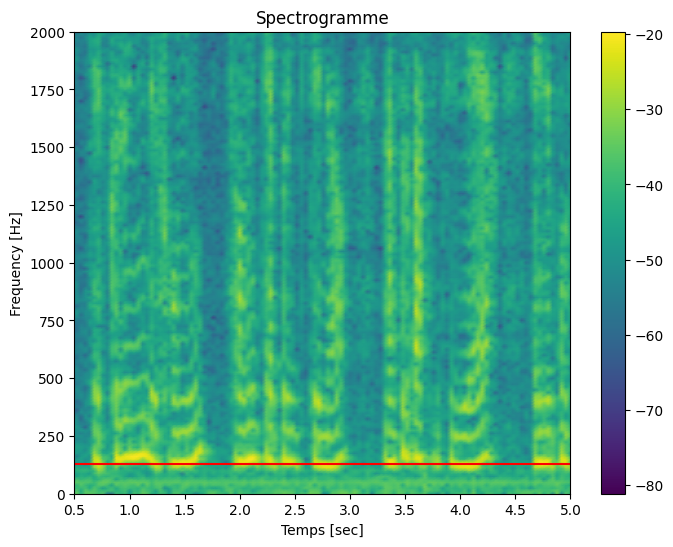

In [57]:
plt.figure(figsize=(8, 6))
f, t, stft_records = stft(
    records,
    fs=sampling_rate,
    nperseg=nperseg,
    nfft=nfft,
    )
plt.xlim([0.5, 5])
plt.ylim([0, 2000])
# Crop the STFT data
plt.pcolormesh(t, f, 10 * np.log10(abs(stft_records)), shading='gouraud', cmap='viridis')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Temps [sec]')
plt.title('Spectrogramme')
plt.axhline(130, color='red')
plt.show()

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle.

Commentez.
    </div>

On a fe = 16000 sample/s, on cherche à estimer le pitch toutes les 20ms. Ainsi, le nombre de samples pendant T=20ms=0.02s. On va calculer le pitch tous les 16000 * 0.02 = 320 samples.

In [58]:
def find_pitch_on_window(records: np.ndarray, sampling_rate: int, nperseg: int, nfft: int) -> np.ndarray:
    f, t, stft_records = stft(
        records,
        fs=sampling_rate,
        nperseg=nperseg,
        nfft=nfft,
        )
    stft_records_log = 10 * np.log10(abs(stft_records))
    list_pitch = np.argmax(stft_records_log, axis=0)
    return f[list_pitch]

La première estimation consiste à prendre la moyenne sur l'ensemble du signal et donne 299.59hz. En revanche, on sait qu'après le cours qu'une voix à un speech entre 0Hz (Homme) et 600Hz (Enfant) sans supposer qu'on connait le locuteur. Ainsi, on peut refaire la moyenne en supprimant les valeurs en dehors de cette plage et l'on trouve : 141.65Hz. Cette valeur est fidèle à la valeur estimée visuellement.

On trouve une première approximation du pitch de 299.5906432748538 hz
On trouve une deuxième approximation du pitch de 141.65154264972776 hz


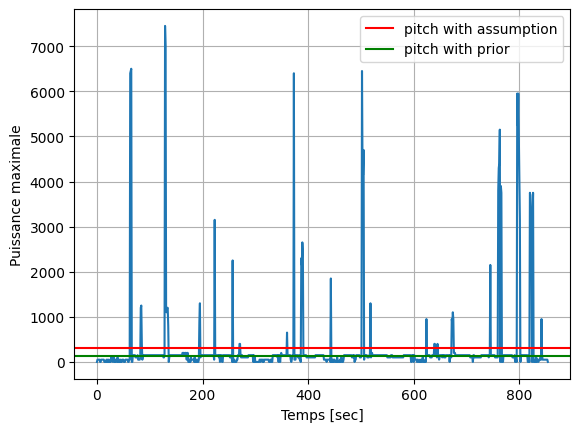

In [59]:
nperseg, nfft = 320, 320
pitches = find_pitch_on_window(records, sampling_rate, nperseg, nfft)
plt.plot(find_pitch_on_window(records, sampling_rate, nperseg, nfft))

# première estimation
avg_pitches = np.mean(pitches)
print(f'On trouve une première approximation du pitch de {avg_pitches} hz')
plt.axhline(avg_pitches, color="red", label="pitch with assumption")

#deuxième approximation
# Sachant que l'on écoute une voix, d'après le cours on sait que le pitch est entre
# 70Hz (Homme) à 600Hz (Enfant)
avg_pitches_prior = np.mean(pitches[(pitches>=70) * (pitches<=600)])
print(f'On trouve une deuxième approximation du pitch de {avg_pitches_prior} hz')
plt.axhline(avg_pitches_prior, color="green", label="pitch with prior")
plt.legend()
plt.grid()
plt.ylabel('Puissance maximale')
plt.xlabel('Temps [sec]');

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz.
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz.
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon.

</div>

In [60]:
donnees = np.load('/content/drive/MyDrive/MASTER MVA/Cours/S1/Apprentissage profond signal/TP1/signaux_impulsions.npz')

signaux = donnees['data']
labels = donnees['labels']

In [61]:
# Information sur le jeu de données
print("Shape de 'signaux': ", signaux.shape)
print("Shape de 'labels': ", labels.shape)

Shape de 'signaux':  (10000, 1000)
Shape de 'labels':  (10000,)


On commence par calculer l'énergie du signal $\epsilon(x) = T_e\sum|x_i|^2$

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil:
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

La première méthode que je vais proposer est très simple. Je vais calculer l'énergie pour chacun des signaux. Ensuite, je vais classer les signaux pour énergie croissante. Enfin, j'espère observer une rupture entre les signaux sans impulsion et avec impulsion. C'est-à-dire que les signaux avec impulsion ait plus d'énergie.

En obsevant la courbe suivante, on peut voir une rupture autour de l'index 9600. Pour cet index, la valeur de la puissance est de 0.516. Ainsi, je vais utiliser cette valeur comme seuil.

Le seuil trouvé empiriquement est 0.516


''

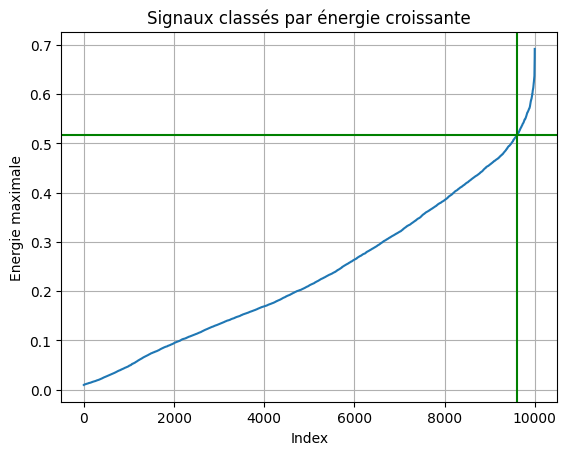

In [62]:
fe = 1000
Te = 1 / fe
energies = Te * np.sum(abs(signaux)**2, axis=1)
index_sorted = np.argsort(energies)
energies_sorted = energies[index_sorted]
labels_sorted = labels[index_sorted]

# valeur trouvée empiriquement
index = 9600
seuil = energies_sorted[index]
print(f'Le seuil trouvé empiriquement est {np.round(seuil, 3)}')
plt.plot(energies_sorted)
plt.axvline(index, color='green')
plt.axhline(seuil, color='green')
plt.grid()
plt.ylabel('Energie maximale')
plt.xlabel('Index')
plt.title('Signaux classés par énergie croissante')
;

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non.
</div>

Maintenant que j'ai fixé ma règle, j'ai juste à calculer l'énergie un signal donné et comparer sa valeur au seuil. Pour cela, j'ai utilisé la signature de la fonction suggéréz.

In [63]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
    fe = 1000
    Te = 1 / fe
    energie = Te * np.sum(abs(signal)**2)
    return energie > seuil

Calcul des prédictions

In [64]:
preds = []
for signal in signaux:
    preds.append(contient_impulsion_energie(signal, seuil))
preds = np.array(preds)

Nous pouvons vérifer visuellement si cette règle est bonne car nous avons les labels. On peut voir que la règle est grossière et qu'elle ne fonctionne que dans les cas très favorables.

''

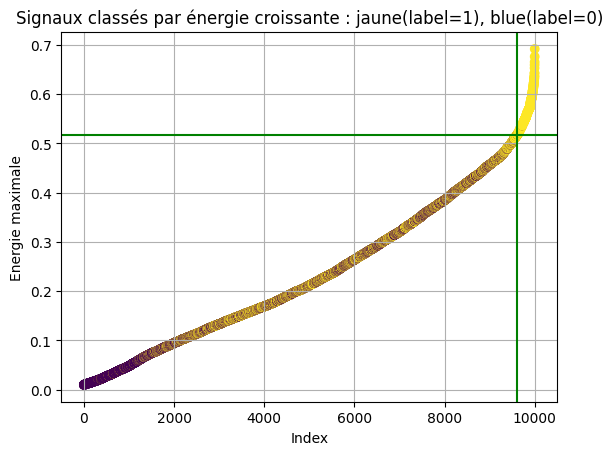

In [65]:
plt.scatter(range(0, len(energies)), energies_sorted, c=labels_sorted)
plt.axvline(index, color='green')
plt.axhline(seuil, color='green')
plt.grid()
plt.ylabel('Energie maximale')
plt.xlabel('Index')
plt.title('Signaux classés par énergie croissante : jaune(label=1), blue(label=0)')
;

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

J'ai fais un fonction que retourner la précision et le rappel à partir des labels et des predictions.

In [66]:
def get_precision_rappel(labels: int, preds: int, with_print=False) -> tuple(int, int):

    VP = sum(labels * preds)
    FP = sum((1-labels) * preds)
    VN = sum((1-labels) * (1-preds))
    FN = sum(labels * (1-preds))
    if with_print:
        print(f'VP : {VP}')
        print(f'FP : {FP}')
        print(f'VN : {VN}')
        print(f'FN : {FN}')

    precision = VP / (VP + FP)
    rappel = VP / (VP + FN)

    return precision, rappel

In [67]:
precision, rappel = get_precision_rappel(labels, preds, with_print=True)

VP : 395.0
FP : 4.0
VN : 4992.0
FN : 4609.0


On obtient une très bonne précision 99%, cela signifie que l'on peut être confiant en nos prédictions. En revanche, on manque énormement d'impulsion car on à un petit rappel de 7.9%.

In [68]:
print(f'La precision est de {np.round(precision * 100, 3)} %')
print(f'Le rappel est de {np.round(rappel * 100, 3)} %')

La precision est de 98.997 %
Le rappel est de 7.894 %


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


La deuxième méthode va utiliser le spectrogramme. Le but va être de trouver les fortes intensités qui sont localisés (car on cherche des pics). Ainsi, je vais cherche l'intensité maximale sur toutes les fenêtres du spectrogramme. Ensuite, je vais faire la même procédure que précedement. Je vais trier les signaux par leur valeur d'intensité maximal. J'espère trouver une rupture plus franche pour en déduire un meilleur seuil.

In [69]:
nperseg, nfft = 100, 100

In [70]:
def pplot(f: int, t: int, stft_records: np.ndarray) -> None:
    plt.figure(figsize=(8, 6))
    # Crop the STFT data
    plt.pcolormesh(t, f, 10 * np.log10(abs(stft_records)), shading='gouraud', cmap='viridis')
    plt.colorbar()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Temps [sec]')
    plt.title('Spectrogramme')
    plt.show()

Je calcule l'intensité maximal du spectrogramme associé à tous les signaux.

In [71]:
max_intensities = []
for signal in signaux:
    _, _, stft_records = stft(
        signal,
        fs=fe,
        nperseg=nperseg,
        nfft=nfft,
        )
    max_intensities.append(np.max(10 * np.log10(abs(stft_records))))
max_intensities = np.array(max_intensities)

En obsevant la courbe suivante, on peut voir une rupture beaucoup plus franche autour de l'index 5150. Pour cet index, la valeur de l'intensité est de -11.64 dB. Ainsi, je vais utiliser cette valeur comme seuil.

Le seuil trouvé empiriquement est -5.82


''

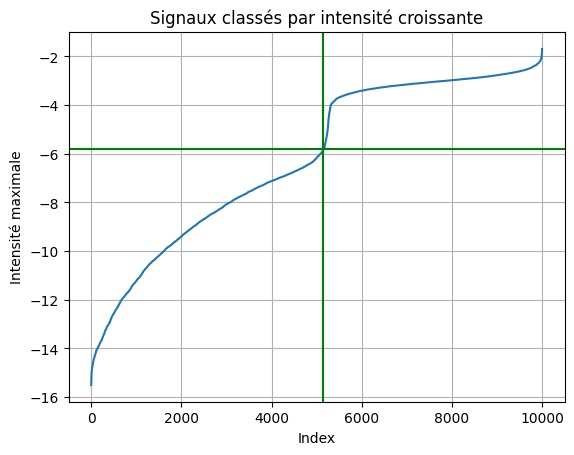

In [72]:
index_sorted = np.argsort(max_intensities)
max_intensities_sorted = max_intensities[index_sorted]
labels_sorted = labels[index_sorted]
index = 5150
seuil = max_intensities_sorted[index]

print(f'Le seuil trouvé empiriquement est {np.round(seuil, 3)}')
plt.plot(max_intensities_sorted)
plt.axvline(index, color='green')
plt.axhline(seuil, color='green')
plt.grid()
plt.ylabel('Intensité maximale')
plt.xlabel('Index')
plt.title('Signaux classés par intensité croissante')
;

Voici la fonction demandée qui prend un signal et qui indique si un signal contient une impulsion en utilisant son spectrogramme.

In [73]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    fe = 1000
    nperseg, nfft = 100, 100
    _, _, stft_records = stft(
        signal,
        fs=fe,
        nperseg=nperseg,
        nfft=nfft,
        )
    max_intensities = np.max(10 * np.log10(abs(stft_records)))
    return max_intensities > seuil

Voici les prédictions.

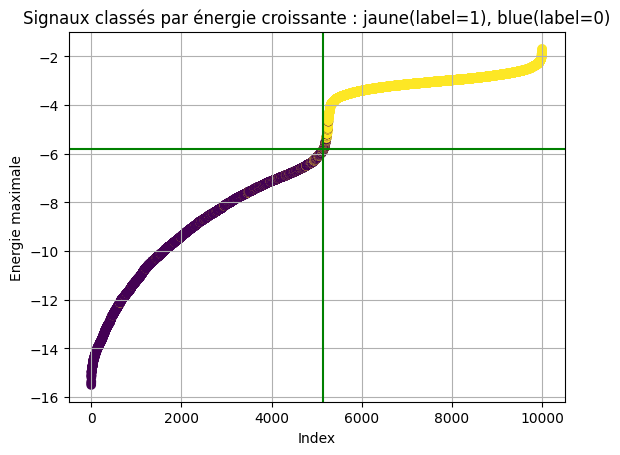

In [74]:
preds = []
for signal in signaux:
    preds.append(contient_impulsion_spectrogramme(signal, seuil))
preds = np.array(preds)
plt.scatter(range(0, len(max_intensities)), max_intensities_sorted, c=labels_sorted)
plt.axvline(index, color='green')
plt.axhline(seuil, color='green')
plt.grid()
plt.ylabel('Energie maximale')
plt.xlabel('Index')
plt.title('Signaux classés par énergie croissante : jaune(label=1), blue(label=0)');

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

Pour rappel on avait précédement : une précision 99% et rappel de 7.9%.

Avec la nouvelle méthode, on a toujours les mêmes performances en précision. En revanche, on a un bien meilleur rappel qui est de 96%. Ainsi, il y a un réel gap de performance entre ces deux méthodes.

In [75]:
precision, rappel = get_precision_rappel(labels, preds, with_print=True)

VP : 4790.0
FP : 59.0
VN : 4937.0
FN : 214.0


In [76]:
print(f'La precision est de {np.round(precision * 100, 3)} %')
print(f'Le rappel est de {np.round(rappel * 100, 3)} %')

La precision est de 98.783 %
Le rappel est de 95.723 %


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme:
$$ \frac{VP}{VP + FP}$$
et le rappel comme:
$$ \frac{VP}{VP +FN} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

Le rappel (recall) mesure la capacité d'un modèle ou d'un système à identifier correctement tous les exemples positifs d'une classe donnée parmi tous les exemples réels de cette classe. Il se calcule comme le nombre d'exemples positifs correctement identifiés divisé par le nombre total d'exemples réels de la classe.

La précision (precision) mesure la capacité d'un modèle ou d'un système à identifier correctement les exemples positifs d'une classe donnée tout en minimisant les faux positifs. Elle se calcule comme le nombre d'exemples positifs correctement identifiés divisé par le nombre total d'exemples identifiés comme positifs.

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils.

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat.
    </div>

Méthode 1 :
J'avais trouvé un seuil de 0.516. Ainsi on peut prendre 10 valeurs de cet ordre de grandeur.

In [77]:
seuils = np.linspace(0.2, 0.6, 20)

precisions = []
rappels = []
for seuil in seuils:
    preds = []
    for signal in signaux:
        preds.append(contient_impulsion_energie(signal, seuil))
    preds = np.array(preds)
    precision, rappel = get_precision_rappel(labels, preds)
    precisions.append(precision)
    rappels.append(rappel)

Le trouve un point de fonctionnement avec :
- rappel $\approx$ 8%
- précision $\approx$ 99%

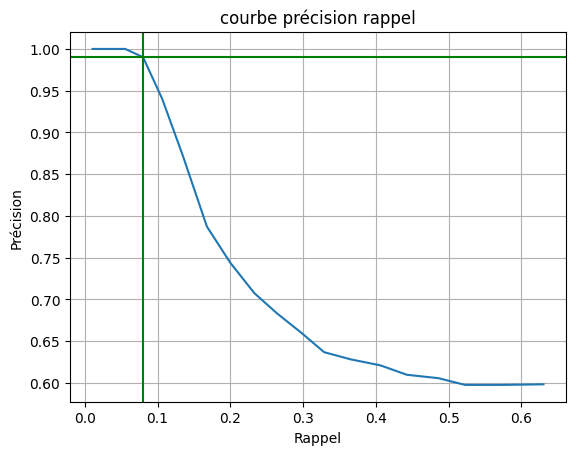

In [78]:
plt.plot(rappels, precisions)
plt.axhline(0.99, color='green')
plt.axvline(0.08, color='green')
plt.grid()
plt.ylabel('Précision')
plt.xlabel('Rappel')
plt.title('courbe précision rappel');

Méthode 2:

In [79]:
seuils = np.linspace(-20, -5, 20)

precisions = []
rappels = []
for seuil in seuils:
    preds = []
    for signal in signaux:
        preds.append(contient_impulsion_spectrogramme(signal, seuil))
    preds = np.array(preds)
    precision, rappel = get_precision_rappel(labels, preds)
    precisions.append(precision)
    rappels.append(rappel)

Le trouve un point de fonctionnement avec :
- rappel $\approx$ 95%
- précision $\approx$ 100%

Ainsi, avec un tout petit effort supplémentaire de grid search, on obtient de meilleurs résultats qui sont excellents.

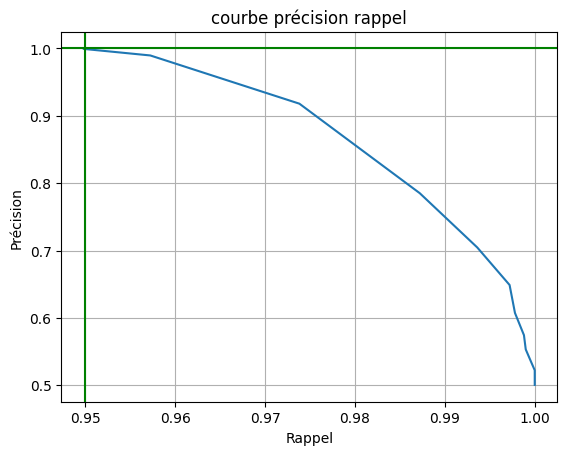

In [80]:
plt.plot(rappels, precisions)
plt.axhline(1, color='green')
plt.axvline(0.95, color='green')
plt.grid()
plt.ylabel('Précision')
plt.xlabel('Rappel')
plt.title('courbe précision rappel');

Pour conclure ce TP 1,

On a appris à extraire le pitch d'un signal visuellement puis à le retrouver grâce à une méthode rudimentaire.

Dans un second temps, on a fait de la détection d'impulsion en utilisant des méthodes de seuil. Une première méthode basée sur l'énergie s'est montrée plus médiocre. Cela paraît logique car une impulsion est très localisée. Ainsi, son énergie peut se noyer dans le bruit. Pour détecter ce comportement local, on s'est ensuite intéressé au spectrogramme qui permet de conserver une relation entre le temps et les fréquences sur des fenêtres localisées temporellement. Cela est intéressant quand on s'intéresse à un phénomène local. Ainsi, en regardant l'intensité en dB, la méthode basée sur un seuil à donnée de bien meilleur résultat. Ce TP montre qu'on peut obtenir sur des exemples simples de très bonnes performances sans passer par de l'apprentissage mais en travaillant sur les données. On a obtenu de très bonnes méthodes qui sont très simples à mettre en place. On pourrait aller gagner quelques points sur la précision et le rappel en utilisant des méthodes d'apprentissages mais le déploiement serait en contrepartie plus compliqué.